<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorios N°01

## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1. Gráfique mediante un gráfico tipo scatter cada grupo. A simple vista, ¿Los grupos son muy distintos entre si?

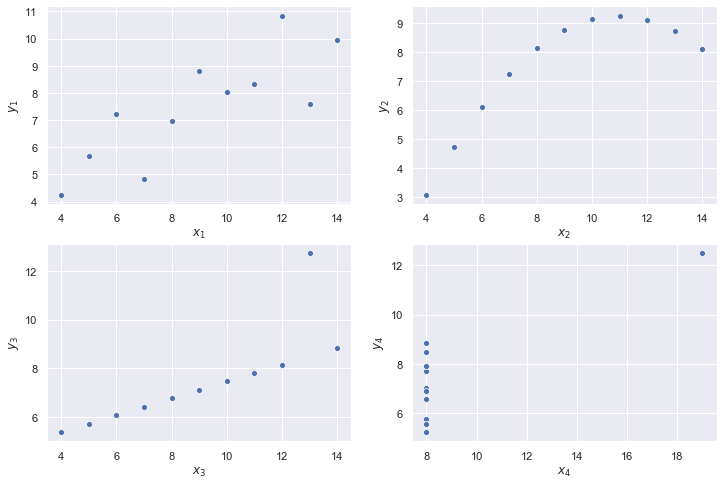

In [3]:
fig = plt.figure(figsize=(12, 8)) #esta es la ventana sobre donde se va a plottear

plt.subplot(2,2,1)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_1']) 
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')

plt.subplot(2,2,2)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_2']) 
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')

plt.subplot(2,2,3)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_3']) 
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')

plt.subplot(2,2,4)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_4']) 
plt.xlabel('$x_4$')
plt.ylabel('$y_4$')

plt.show()

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando describe para cada grupo. Interprete.

In [4]:
df.groupby(['grupo']).describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

Se ve que en principio, los estadísticos son similares, la media y la desviación estandar se acercan bastante. Sin embargo, se ve en los gráficos que no son muy parecidos, tal vez el grupo 1 y el 3 se parecen, pero los otros 2 no se acercan a lo que podría ser un modelo lineal, se van a ver casi igual, pero los R^2 cambiarán bastante dependiendo del grupo. 
El 4to podría tomarse como  un x=8 con un outlayer, y el 2do como una suerte de función polinómica.

3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [6]:
#Se importan las librerías a utilizar de modelos lineales
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Se crean los 4 modelos con linear regression:
#Modelo 1:
model_rl1 = LinearRegression() 
x1 = df[df['grupo'] == 'Grupo_1'][['x']]
y1 = df[df['grupo'] == 'Grupo_1']['y']
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

model_rl1.fit(X1_train,y1_train)

#Modelo 2:
model_rl2 = LinearRegression()
x2 = df[df['grupo'] == 'Grupo_2'][['x']]
y2 = df[df['grupo'] == 'Grupo_2']['y']
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

model_rl2.fit(X2_train,y2_train)

#Modelo 3:
model_rl3 = LinearRegression() 
x3 = df[df['grupo'] == 'Grupo_3'][['x']]
y3 = df[df['grupo'] == 'Grupo_3']['y']
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

model_rl3.fit(X3_train,y3_train)

#Modelo 4:
model_rl4 = LinearRegression()
x4 = df[df['grupo'] == 'Grupo_4'][['x']]
y4 = df[df['grupo'] == 'Grupo_4']['y']
X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.33, random_state=42)

model_rl4.fit(X4_train,y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

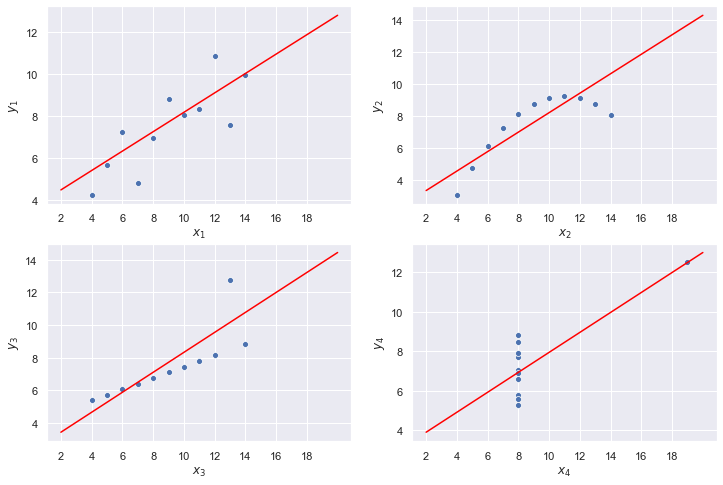

In [7]:
# Lista de coeficientes beta para cada modelo:
beta_1_0 = round(model_rl1.intercept_,4)
beta_1_1 = round(model_rl1.coef_[0],4)

beta_2_0 = round(model_rl2.intercept_,4)
beta_2_1 = round(model_rl2.coef_[0],4)

beta_3_0 = round(model_rl3.intercept_,4)
beta_3_1 = round(model_rl3.coef_[0],4)

beta_4_0 = round(model_rl4.intercept_,4)
beta_4_1 = round(model_rl4.coef_[0],4)

#Se definen los arreglos para graficar:
x1_range = np.arange(2,21,1)
y1_range=[beta_1_0 + beta_1_1*n for n in x1_range]
y2_range=[beta_2_0 + beta_2_1*n for n in x1_range]
y3_range=[beta_3_0 + beta_3_1*n for n in x1_range]
y4_range=[beta_4_0 + beta_4_1*n for n in x1_range]

#Aqui los dataframes:
df_plot1 = pd.DataFrame({'x':x1_range,
                        'y':y1_range})
df_plot2 = pd.DataFrame({'x':x1_range,
                        'y':y2_range})
df_plot3 = pd.DataFrame({'x':x1_range,
                        'y':y3_range})
df_plot4 = pd.DataFrame({'x':x1_range,
                        'y':y4_range})


fig = plt.figure(figsize=(12, 8)) #Esta es la ventana, tal como antes

#Grafico 1:
plt.subplot(2,2,1)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_1']) 
sns.lineplot(x='x', y='y', data=df_plot1,color="red")
plt.xlabel('$x_1$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_1$')

#Grafico 2:
plt.subplot(2,2,2)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_2'])
sns.lineplot(x='x', y='y', data=df_plot2,color="red")
plt.xlabel('$x_2$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_2$')

#Grafico 3:
plt.subplot(2,2,3)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_3'])
sns.lineplot(x='x', y='y', data=df_plot3,color="red")
plt.xlabel('$x_3$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_3$')

#Grafico 4:
plt.subplot(2,2,4)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_4'])
sns.lineplot(x='x', y='y', data=df_plot4,color="red")
plt.xlabel('$x_4$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_4$')

plt.show()

Pasó la hipótesis que se dio en el item 2, las regresiones son similares, pero claramente no se ajustan bien al 2do y al 4to.
Se ve también una pendiente bastante mala en el 3ro por el outlayer.

4. Calcule los resultados de las métricas para cada grupo. Interprete.

In [9]:
from metrics_regression import *
from sklearn.metrics import r2_score

#Metricas del grupo 1:
df_temp = pd.DataFrame({
        'y':y1_test,
        'yhat': model_rl1.predict(X1_test)
        })

df_metrics= summary_metrics(df_temp) #Se crea el dataframe de metricas ahora solo con el grupo 1
df_metrics['r2'] =  round(r2_score(y1_test, model_rl1.predict(X1_test)),4)

#Metricas del grupo 2:
df_temp = pd.DataFrame({
        'y':y2_test,
        'yhat': model_rl2.predict(X2_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y2_test, model_rl2.predict(X2_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 2 al ya existente 

#Metricas del grupo 3:
df_temp = pd.DataFrame({
        'y':y3_test,
        'yhat': model_rl3.predict(X3_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y3_test, model_rl3.predict(X3_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 3 al ya existente 

#Metricas del grupo 4:
df_temp = pd.DataFrame({
        'y':y4_test,
        'yhat': model_rl4.predict(X4_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y4_test, model_rl4.predict(X4_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 4 al ya existente 

grupos = pd.Series(['Grupo_1','Grupo_2','Grupo_3', 'Grupo_4']) #Se cambia el indice para mostrar cada grupo
df_metrics.set_index(keys=grupos)
df_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.5907,0.9878,0.9939,0.1165,0.1113,0.0829,0.0971,0.0990,0.7572
0,1.1934,2.0670,1.4377,0.1569,0.1541,0.1633,0.1381,0.1484,0.2186
0,0.8342,1.1773,1.0850,0.1067,0.1057,0.1173,0.0943,0.1005,0.1432
0,0.3700,0.2736,0.5230,0.0496,0.0495,0.0521,0.0437,0.0514,-0.1234


Es claro que el primer modelo es el que mejor se ajusta, un R^2 de 0.75 es bastante aceptable. 
El tercero es un caso especial, porque se observa en la data que el modelo si es lineal, pero el outlayer destruyó el ajuste notoriamente, produciendo ese r^2 terrible de 0.14. 
Respecto a los otros se denota en bajos r^2 que no hay una buena correlación lineal de los datos, como se observaba gráficamente, incluso se tiene un r^2 negativo para grupo 4.


5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.

Como he comentado en ítemes anteriores, los problemas son los grupos del 2 al 4.
Para el grupo 2, probaría algún ajuste polinomial, a simple vista diría que es cuadrático. Creo que con eso se ajustaría mejor.
En el caso del 3, es evidente que hay que eliminar ese outlayer para obtener un ajuste lineal bueno, baso esta opinión solo mirando el gráfico.
Siguiendo con el grupo 4, mi idea sería sacar ese outlayer, y modelar con la recta x=8. Es posible ver que la información está toda concentrada en esa recta, así que opino que eso se ajustaría bien.